In [16]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

desired_frac = 0.5

def bernoulli_with_odds(key, log_odds, shape= None):
    """odds = p / (1-p)
        p= 1 / (1 + 1/odds) = 1 / (1 + exp(-log_odds)) = sigmoid(log_odds)
    """
    return jax.random.bernoulli(key, p= jax.nn.sigmoid(log_odds), shape= shape)

data = pd.read_csv('../data/real_0_0.csv')

log_odds = jnp.array(data['log_prior_odds'])
prob = jax.nn.sigmoid(log_odds)

-3.65642550207175


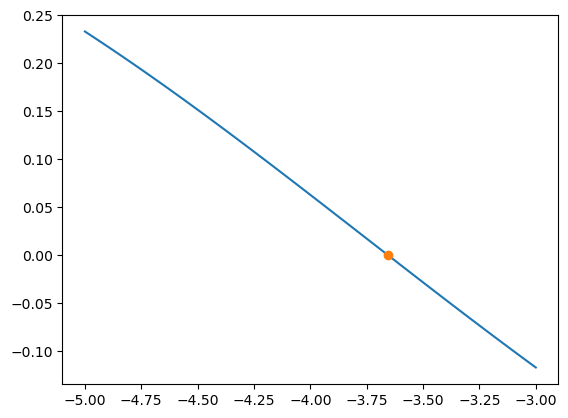

In [17]:
from scipy.optimize import brentq

def func(shift):
    return desired_frac - jnp.average(jax.nn.sigmoid(log_odds + shift))

a, b = -5., -3.
root = brentq(func, a, b)
print(root)
shift = jnp.linspace(a, b, 100)
func = jax.vmap(func)(shift)

plt.plot(shift, func)
plt.plot([root, ], [0.], 'o')
plt.show()

In [15]:
inject = bernoulli_with_odds(jax.random.key(42), log_odds + root, shape= (len(log_odds), ))
print(jnp.average(inject))

0.49896845
